In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
df = pd.read_csv('excel_vnm.csv')
df

,<Ticker>,<DTYYYYMMDD>,<OpenFixed>,<HighFixed>,<LowFixed>,<CloseFixed>,<Volume>
0,VNM,20060119,2.7339,2.7339,2.7339,2.7339,109350
1,VNM,20060120,2.7339,2.8371,2.7339,2.7855,157840
2,VNM,20060123,2.7855,2.7855,2.7081,2.7081,81400
3,VNM,20060124,2.7081,2.7081,2.6823,2.6823,66000
4,VNM,20060125,2.6823,2.7339,2.6823,2.7339,57220
...,...,...,...,...,...,...,...
3900,VNM,20210910,85.2000,87.0000,85.0000,86.5000,3962100
3901,VNM,20210913,86.5000,87.4000,86.3000,87.2000,2956200
3902,VNM,20210914,87.2000,87.3000,86.6000,87.0000,2482900
3903,VNM,20210915,86.8000,86.8000,86.1000,86.1000,2425000


In [19]:
'''Create a Return_fixed column with initialize value is 0'''
df['ReturnFixed'] = df.apply(lambda row: 0)
df

,<Ticker>,<DTYYYYMMDD>,<OpenFixed>,<HighFixed>,<LowFixed>,<CloseFixed>,<Volume>,ReturnFixed
0,VNM,20060119,2.7339,2.7339,2.7339,2.7339,109350,NaN
1,VNM,20060120,2.7339,2.8371,2.7339,2.7855,157840,NaN
2,VNM,20060123,2.7855,2.7855,2.7081,2.7081,81400,NaN
3,VNM,20060124,2.7081,2.7081,2.6823,2.6823,66000,NaN
4,VNM,20060125,2.6823,2.7339,2.6823,2.7339,57220,NaN
...,...,...,...,...,...,...,...,...
3900,VNM,20210910,85.2000,87.0000,85.0000,86.5000,3962100,NaN
3901,VNM,20210913,86.5000,87.4000,86.3000,87.2000,2956200,NaN
3902,VNM,20210914,87.2000,87.3000,86.6000,87.0000,2482900,NaN
3903,VNM,20210915,86.8000,86.8000,86.1000,86.1000,2425000,NaN


In [20]:
'''Rename columns'''
df.rename(columns={'<Ticker>': 'Ticker', \
                   '<DTYYYYMMDD>': 'DTYYYYMMDD',\
                   '<OpenFixed>': 'OpenFixed', \
                   '<LowFixed>': 'LowFixed', \
                   '<HighFixed>': 'HighFixed', \
                   '<CloseFixed>': 'CloseFixed', \
                   '<Volume>': 'Volume'
                  }, inplace=True)
df

,Ticker,DTYYYYMMDD,OpenFixed,HighFixed,LowFixed,CloseFixed,Volume,ReturnFixed
0,VNM,20060119,2.7339,2.7339,2.7339,2.7339,109350,NaN
1,VNM,20060120,2.7339,2.8371,2.7339,2.7855,157840,NaN
2,VNM,20060123,2.7855,2.7855,2.7081,2.7081,81400,NaN
3,VNM,20060124,2.7081,2.7081,2.6823,2.6823,66000,NaN
4,VNM,20060125,2.6823,2.7339,2.6823,2.7339,57220,NaN
...,...,...,...,...,...,...,...,...
3900,VNM,20210910,85.2000,87.0000,85.0000,86.5000,3962100,NaN
3901,VNM,20210913,86.5000,87.4000,86.3000,87.2000,2956200,NaN
3902,VNM,20210914,87.2000,87.3000,86.6000,87.0000,2482900,NaN
3903,VNM,20210915,86.8000,86.8000,86.1000,86.1000,2425000,NaN


In [25]:
''' Calculate ReturnFixed value '''
for i in range(len(df) - 1):
    df['ReturnFixed'][i] = (df['CloseFixed'][i] - df['CloseFixed'][i + 1])*100/df['CloseFixed'][i + 1]
df['ReturnFixed'][len(df) - 1] = None
df

<ipython-input-25-b09f369a25d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ReturnFixed'][i] = (df['CloseFixed'][i] - df['CloseFixed'][i + 1])*100/df['CloseFixed'][i + 1]
<ipython-input-25-b09f369a25d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ReturnFixed'][len(df) - 1] = None


,Ticker,DTYYYYMMDD,OpenFixed,HighFixed,LowFixed,CloseFixed,Volume,ReturnFixed
0,VNM,20060119,2.7339,2.7339,2.7339,2.7339,109350,-1.852450
1,VNM,20060120,2.7339,2.8371,2.7339,2.7855,157840,2.858092
2,VNM,20060123,2.7855,2.7855,2.7081,2.7081,81400,0.961861
3,VNM,20060124,2.7081,2.7081,2.6823,2.6823,66000,-1.887414
4,VNM,20060125,2.6823,2.7339,2.6823,2.7339,57220,-0.934884
...,...,...,...,...,...,...,...,...
3900,VNM,20210910,85.2000,87.0000,85.0000,86.5000,3962100,-0.802752
3901,VNM,20210913,86.5000,87.4000,86.3000,87.2000,2956200,0.229885
3902,VNM,20210914,87.2000,87.3000,86.6000,87.0000,2482900,1.045296
3903,VNM,20210915,86.8000,86.8000,86.1000,86.1000,2425000,-0.347222


In [27]:
'''Create a Return column with None value initialized'''
df['Return'] = df.apply(lambda row: 0)
df

,Ticker,DTYYYYMMDD,OpenFixed,HighFixed,LowFixed,CloseFixed,Volume,ReturnFixed,Return
0,VNM,20060119,2.7339,2.7339,2.7339,2.7339,109350,-1.852450,NaN
1,VNM,20060120,2.7339,2.8371,2.7339,2.7855,157840,2.858092,NaN
2,VNM,20060123,2.7855,2.7855,2.7081,2.7081,81400,0.961861,NaN
3,VNM,20060124,2.7081,2.7081,2.6823,2.6823,66000,-1.887414,NaN
4,VNM,20060125,2.6823,2.7339,2.6823,2.7339,57220,-0.934884,NaN
...,...,...,...,...,...,...,...,...,...
3900,VNM,20210910,85.2000,87.0000,85.0000,86.5000,3962100,-0.802752,NaN
3901,VNM,20210913,86.5000,87.4000,86.3000,87.2000,2956200,0.229885,NaN
3902,VNM,20210914,87.2000,87.3000,86.6000,87.0000,2482900,1.045296,NaN
3903,VNM,20210915,86.8000,86.8000,86.1000,86.1000,2425000,-0.347222,NaN


In [29]:
min_return, max_return = min(df['ReturnFixed']), max(df['ReturnFixed'])
min_return, max_return

(-6.542109824468855, 7.526856985116516)

<ipython-input-36-9d68f9dc7a35>:5: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  ax2 = fig.add_axes()


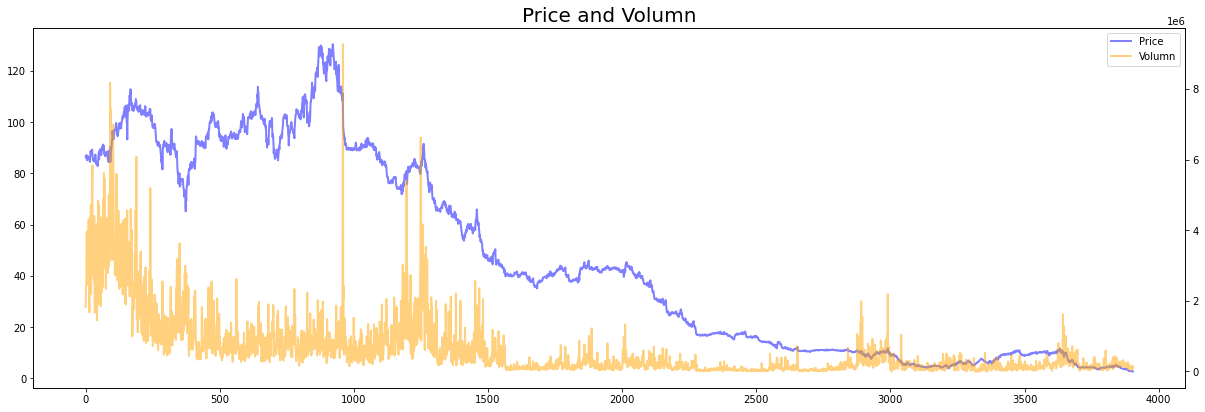

In [36]:
fig = plt.figure(figsize=(8, 5))
line_weight = 2
alpha = .5
ax1 = fig.add_axes([0, 0, 2, 1])
ax2 = fig.add_axes() 

ax2 = ax1.twinx()
lns1 = ax1.plot(price, color='blue', lw=line_weight, alpha=alpha, label='Price')
lns2 = ax2.plot(volume, color='orange', lw=line_weight, alpha=alpha, label='Volumn')

leg = lns1 + lns2
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=0)
plt.show()